# Fuzzy (10 - 25 pts)

### 1. Explain Fuzzy Clustering

- Provide formulas via tex code
- Provide your text explanation
- Provide your plot demonstration

Fuzzy clustering is a method that does not hard assign each to point to cluster. It gives probability that point assigns to a cluster.


Our goal is to minimize the following function:
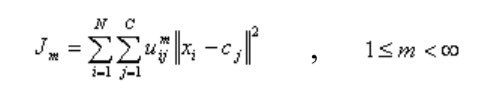

### 2. Implement Fuzzy Clustering

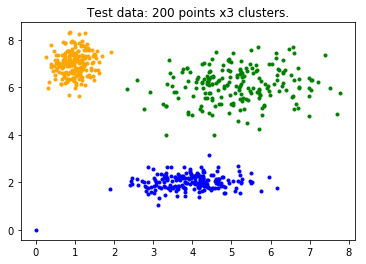

In [2]:
# Fuzzy logic principles can be used to cluster multidimensional data, assigning each point a membership in each 
# cluster center from 0 to 100 percent. This can be very powerful compared to traditional hard-thresholded clustering
# where every point is assigned a crisp, exact label. 

from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')
plt.show()

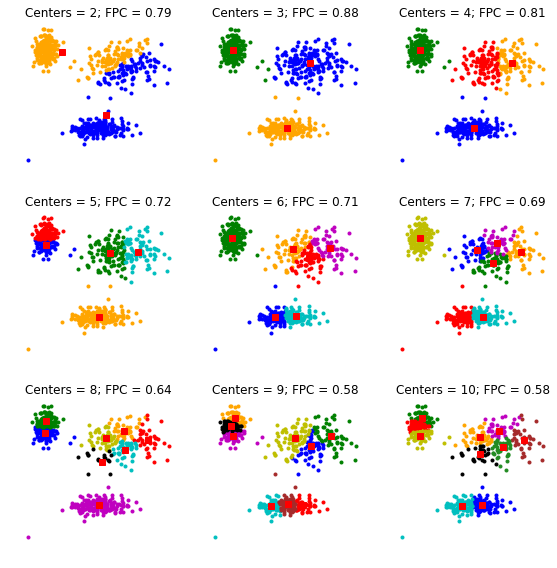

In [5]:
# Above is our test data. We see three distinct blobs. However, what would happen if we didn’t know how many clusters
# we should expect? Perhaps if the data were not so clearly clustered? 
# Let’s try clustering our data several times, with between 2 and 9 clusters.

fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
plt.show()

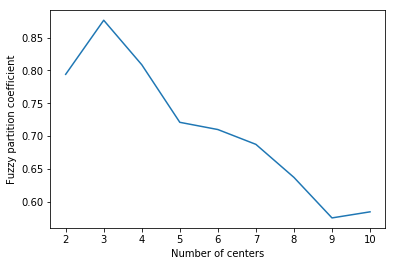

In [6]:
# The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric which tells us how cleanly our data 
# is described by a certain model. Next we will cluster our set of data - which we know has three clusters - several 
# times, with between 2 and 9 clusters. We will then show the results of the clustering, and plot the fuzzy partition
# coefficient. When the FPC is maximized, our data is described best. 


fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.show()

# As we can see, the ideal number of centers is 3. This isn’t news for our contrived example, but having the FPC 
# available can be very useful when the structure of your data is unclear. 

# Note that we started with two centers, not one; clustering a dataset with only one cluster center is the trivial 
# solution and will by definition return FPC == 1. 

### 3. Explain probabilistic model-based clustering

- Provide formulas via tex code:
1.choose cluster
2.choose instance according to its probability density funciton
- Provide your text explanation: the data are viewed as coming from a distribution that is mixture of two or more clusters
- Provide your plot demonstration: done below

### 4. Implement probabilistic model-based clustering

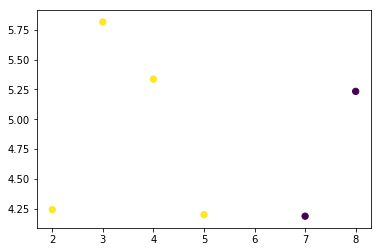

In [9]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.mixture import GaussianMixture

data = np.column_stack((x, y[0]))

clf = GaussianMixture(n_components=2, covariance_type='full').fit(data)
pred = clf.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=pred, s=40, cmap='viridis');

In [10]:
probs = clf.predict_proba(data)
print(probs.round(3))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


### 5. Apply your solutions to given dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt

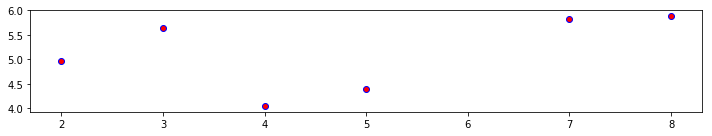

In [4]:
x = np.array([2, 3, 4, 5, 7, 8])
rnd = np.random.random(size=(1, x.size))
ch = np.random.choice([-1,+1], x.size)

y = 5 + ch*rnd
data = np.column_stack((x, y[0]))
fig, ax = plt.subplots(figsize=(10, 2))
ax.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
fig.tight_layout()

[[2.03954865 3.03522222 4.00065005 4.99195257 6.98420494 7.97169819]
 [4.91619527 5.59717789 4.04793274 4.40660726 5.83532082 5.91311193]]


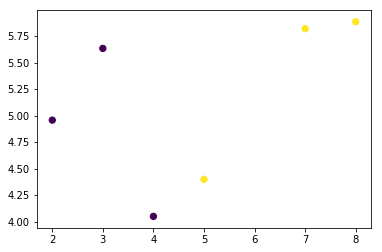

In [11]:
from skfuzzy.cluster import cmeans, cmeans_predict
cntr, u, u0, d, jm, p, fpc = cmeans(data,2,2,0.25,500)
print(cntr)

temp = []
tem1 = []

for i in cntr[0]:
    temp.append(i)
for i in cntr[1]:
    tem1.append(i)
pred = []
for i in range(len(temp)):
    if(tem1[i]<temp[i]):
        pred.append(1)
    else:
        pred.append(0)
        
plt.scatter(data[:, 0], data[:, 1], c=pred, s=40, cmap='viridis');

### 6. Answer questions

- What are the major differences in concepts

Fuzzy clustering is heuristic and is not based on formal models. Furthermore, it is commonly randomnly initialized, so its different runs will often yield different results. Additionally, Fuzzy requires the user to specify the the optimal number of clusters.

An alternative is model-based clustering, which consider the data as coming from a distribution that is mixture of two or more clusters. In model-based clustering, the data is considered as coming from a mixture of density. Thus, model-based clustering is more flexible and helps to incorporate our knowledge about a domain instead of using rigid assumptions about the data derived from Fuzzy.

Each component (i.e. cluster) k is modeled by the normal or Gaussian distribution which is characterized by the parameters:  mean vector, covariance matrix, an associated probability in the mixture (each point has a probability of belonging to each cluster).